# PART 1
## Task 1 + 2

In [2]:
import scipy
import numpy as np
import matplotlib
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
input_file="google_reviews.csv"

In [4]:
def get_df(file):
    dataset = pd.read_csv(file)
    df = pd.DataFrame(dataset)
    df=df.fillna(0)
    return df
df=get_df(input_file)

## Task 3

In [5]:
#cases = data points = every user = every line
#dimentions = parameters = columns
#therefore: 

def getSize(df):
    print('5. Cases = Raws:',df.shape[0])
    print('6. Dimentions = Columns:',df.shape[1])
    
    
getSize(df)

## 7.  each raw represents a user choices which will represent a data point 

5. Cases = Raws: 5454
6. Dimentions = Columns: 24


7.every Raw in the table is a data point. meaning every data point is vercor with 24 values of 1 and zeros. 

# PART 2
## Task 4

### question 8

In [73]:
distance_metric='euclidean'
k_range = np.arange(2, 6, 1)

In [74]:
# Build model function
def get_clusterer(points,k):
    clusterer = KMeans (n_clusters=k)
    preds = clusterer.fit_predict(points)
    return clusterer,preds

In [75]:
#bulding the model for each K in range 2 to 5. 
def get_silheuettes(df,preds):
    Silhouettes = []
    for k in k_range:
        clusterer,preds=get_clusterer(df,k)
        Silhouettes.append(silhouette_score (df, preds, metric='euclidean'))
    return Silhouettes
Silhouettes = get_silheuettes(df,preds)



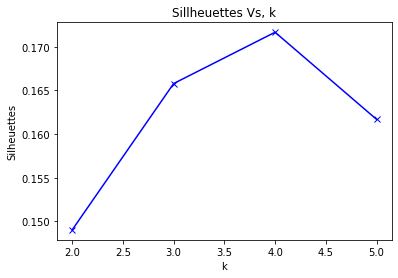

In [123]:
# plot the silhouttes results. 
def show_silhouettes (Silhouettes):
    plt.plot(k_range, Silhouettes, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silheuettes')
    plt.title('Sillheuettes Vs, k')
    plt.show()
show_silhouettes(Silhouettes)



#### therefor we can see that the best K is 4 becouse its gives the hightest silhouettes , we can still see that the silhouette is not verry high which migth say that every time we will creat the Kmeans seperation due to the random places we start with the allocation of some data points might change

### question 9

In [116]:

# Build model for K=4
K=4
def get_clusterer(points,k):
    clusterer = KMeans (n_clusters=k)
    preds = clusterer.fit_predict(points)
    return clusterer,preds
clusterer,preds=get_clusterer(df,K)

In [115]:
def show_labels_results (clusterer):
    print('labels:', clusterer.labels_, '\n') 
show_labels_results(clusterer)

labels: [3 3 3 ... 2 2 2] 



In [109]:
#### therefor becouse it printed for the results: labels: [3 3 3 ... 2 2 2] 
#### it means that the first 2 data points are in group 3 and the last 2 data points are in group 2

centroids:
0 : [0.11186186 0.28153153 0.25825826 0.16891892 0.02702703 0.01426426
 0.09384384 0.01501502 0.13438438 0.05105105 0.01651652 0.00750751
 0.01726727 0.06981982 0.28978979 0.15015015 0.14114114 0.12087087
 0.23348348 0.22072072 0.1463964  0.35885886 0.22897898 0.20645646] 

1 : [0.02312139 0.13410405 0.04277457 0.0265896  0.10520231 0.13063584
 0.53179191 0.06936416 0.33526012 0.31213873 0.36878613 0.45202312
 0.65433526 0.97225434 0.67861272 0.09479769 0.06127168 0.05549133
 0.07861272 0.08208092 0.00809249 0.02427746 0.00693642 0.0566474 ] 

2 : [0.00851582 0.18430657 0.09367397 0.1149635  0.23357664 0.5377129
 0.91909976 0.85523114 0.96958637 0.77493917 0.48600973 0.08029197
 0.12469586 0.17883212 0.29987835 0.04014599 0.00729927 0.00364964
 0.00486618 0.02189781 0.00364964 0.09549878 0.04379562 0.01155718] 

3 : [9.91940484e-03 2.23806572e-01 4.02355859e-01 7.58214507e-01
 9.69621823e-01 7.14197148e-01 5.87104774e-01 8.67947923e-02
 1.64290143e-01 1.56230626e-01 1.903285

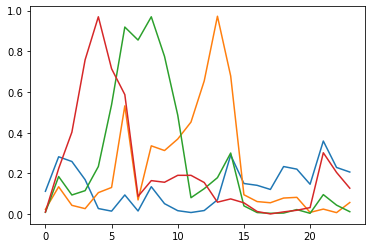

In [122]:
def show_results (clusterer):
    centers = clusterer.cluster_centers_
    print('centroids:')
    for i in range(K):
        print(i,':',centers[i,:],'\n')
    for i in range(K):
        plt.plot(centers[i,:])
show_results(clusterer)

### question 10 - Result analysis: 


#### blue = cluster 0
we can see that this cluster doesnt have a very high pick which means that there is not even one dimension (one category) tht most of the data points (people) in this cluster voted fore together. but the highhest pick in that graph is about dimention 21 (starts counting with 0) which 38% of the people signed 3 or above on it. \



#### orange = cluster 1
we can se veryy big spike in this cluster in the 13th (starts from 0) columns where almost 100% of the people in the cluster voted more than 3 on this category. in addition we can see that category 12th got more than 64% present of the people in that cluster vote 3 or more and and 6th and 7th categories got as well 53% and 69% votes of 3 and above. 

which means that this people love  Malls (53% voted 3 or above), Restaurants(69% voted 3 or above), Art Galleries (99% voted 3 or above) and Juice Bars (64% voted 3 or above)



#### green = cluster 2
The everage grean loves 3 main things (raws 6-8) which are: Malls (91% from the people in the group voted 3 or above), Zoo (85% voted 3 or above) and resturants (96% voted 3 or above).
in addition there is segnificant amount of people in that group that likes Museums (53% voted 3 or above) and Pubs/Bars (77% voted 3 or above)




#### red = cluster 3
The red graph have one high pick at column number 4 which is: Parks (96% of the people in that group voted 3 or above for that category) in addition we can also see that 75% of them like Beaches and 71% of them likes Theaters as well. 



